# Preparing data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('test_db.csv')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
df = df.drop(['origin'], axis=1)
df = df.drop(['name'], axis=1)

# Prepering Cluster Tool

In [5]:
from main import Cluster

In [6]:
db = Cluster(df)

In [7]:
db.df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82
388,44.0,4,97.0,52.0,2130,24.6,82
389,32.0,4,135.0,84.0,2295,11.6,82
390,28.0,4,120.0,79.0,2625,18.6,82


## Data preprocessing

In [8]:
db.preprocessing(scaler="MinMaxScaler")

In [9]:
db.X

,0,1,2,3,4,5,6
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0


# AgglomerativeClustering

## Agglomerative Clustering Distance Analysis

This cell performs an agglomerative clustering distance analysis using the `db.agglo_distance()` method. The method takes three parameters:

- `min_d`: The minimum distance threshold for clustering.
- `max_d`: The maximum distance threshold for clustering.
- `range_d`: The range of distance thresholds to analyze.

The `db.agglo_distance()` method calculates the clustering results for different distance thresholds within the specified range. It provides insights into the clustering behavior based on different distance criteria.

Depends on Silhouette and Distance_threchold paramenters it is possible to choose optimal amount of clusters (Silhouette --> 1, Distance_threchold --> 1)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 103.15it/s]


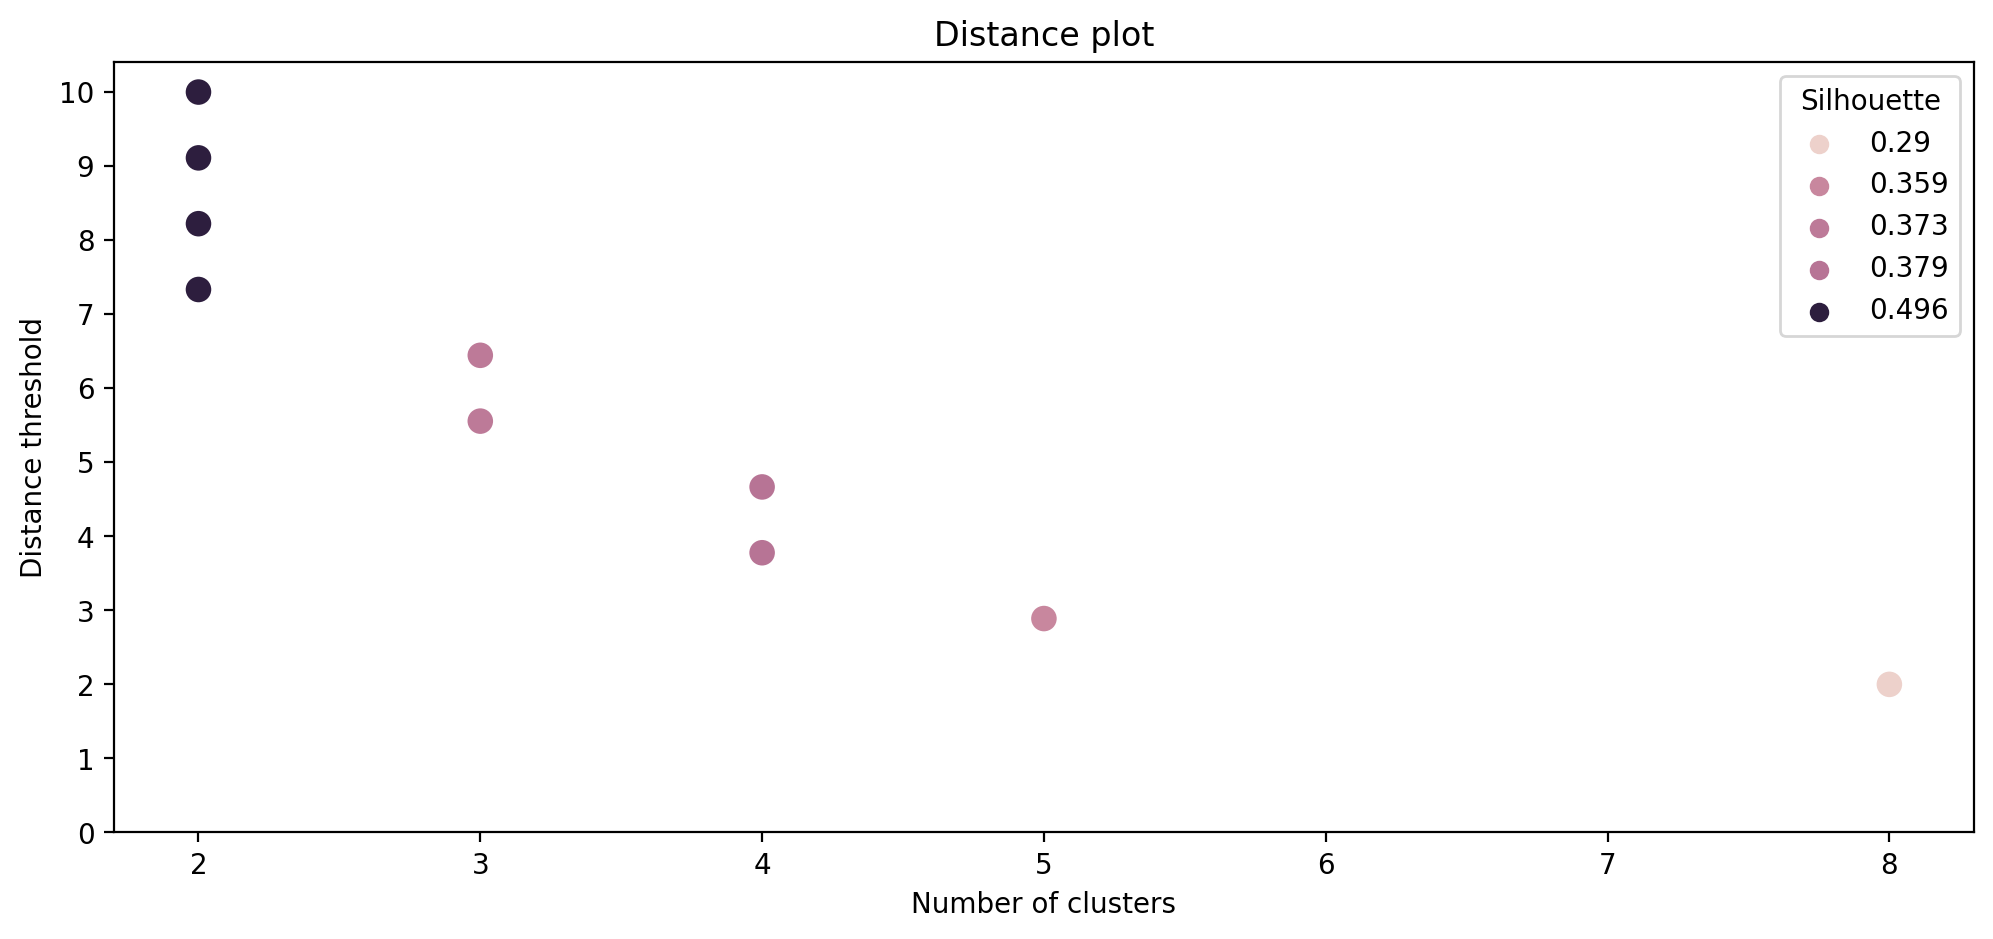

,0,1,2,3,4,5,6,7,8,9
number_of_clusters,8.00,5.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000
distance_threshold,2.00,2.888889,3.777778,4.666667,5.555556,6.444444,7.333333,8.222222,9.111111,10.000
silhouette,0.29,0.359000,0.379000,0.379000,0.373000,0.373000,0.496000,0.496000,0.496000,0.496


In [10]:
db.agglo_distance(min_d=2, max_d=10, range_d=10)

## Agglomerative Clustering Knife Analysis

This cell performs an agglomerative clustering knife analysis using the `db.agglo_knife()` method. The method takes three parameters:

- `min_k`: The minimum number of clusters to analyze.
- `max_k`: The maximum number of clusters to analyze.
- `step`: The step size for incrementing the number of clusters.
- ` knife`: Optional parameter for drawing diagram

The `db.agglo_knife()` method calculates the clustering results for different numbers of clusters within the specified range. It provides insights into the clustering behavior based on different cluster sizes.

By analyzing the results, you can determine the optimal number of clusters for your dataset based on various evaluation metrics such as silhouette score, within-cluster sum of squares, or other domain-specific criteria.

Build selected range of clusters and represent knife metric to ich of them 'Knifes' should be similar to ich other and have good shape without leakages

  0%|          | 0/3 [00:00<?, ?it/s]

n_clusters = 2 average silhouette_score = 0.496


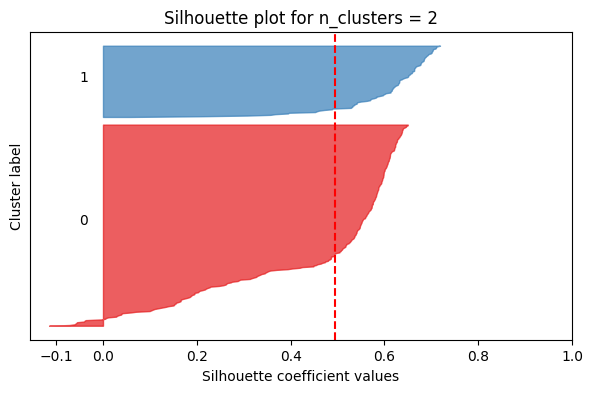

 33%|███▎      | 1/3 [00:00<00:00,  8.10it/s]

n_clusters = 3 average silhouette_score = 0.373


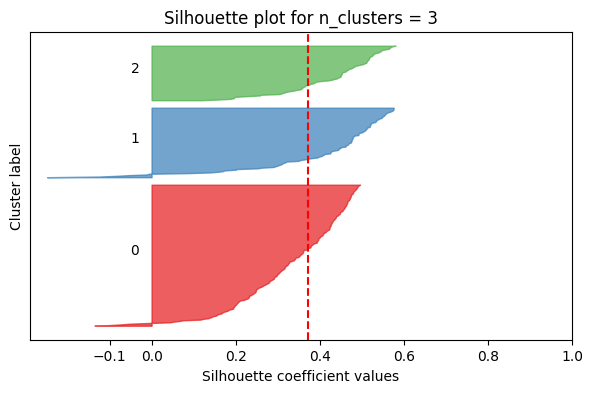

n_clusters = 4 average silhouette_score = 0.379


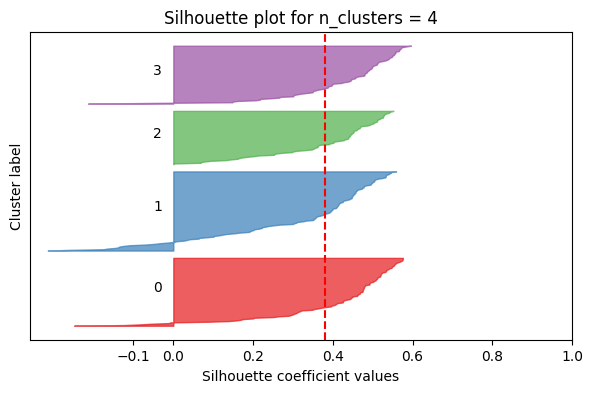

100%|██████████| 3/3 [00:00<00:00,  9.49it/s]


,2,3,4
silhouette,0.496,0.373,0.379


In [11]:
db.agglo_knife(min_k=2, max_k=5, step=1)

In [12]:
db.agglo_knife(min_k=2, max_k=5, knife=False)

  0%|          | 0/3 [00:00<?, ?it/s]

n_clusters = 2 average silhouette_score = 0.496


100%|██████████| 3/3 [00:00<00:00, 28.84it/s]

n_clusters = 3 average silhouette_score = 0.373
n_clusters = 4 average silhouette_score = 0.379


,2,3,4
silhouette,0.496,0.373,0.379


# K-Means

## K-Means Mount Analysis

This cell performs a K-Means mount analysis using the `db.kmean_mount()` method. The method takes two parameters:

- `min_n`: The minimum number of clusters to analyze.
- `max_n`: The maximum number of clusters to analyze.

The `db.kmean_mount()` method calculates the clustering results for different numbers of clusters within the specified range. It provides insights into the clustering behavior based on different cluster sizes.

By analyzing the results, you can determine the optimal number of clusters for your dataset based on various evaluation metrics such as silhouette score, within-cluster sum of squares, or other domain-specific criteria.

To perform the K-Means mount analysis, call the `db.kmean_mount()` method with the desired range of cluster numbers.


100%|██████████| 8/8 [00:00<00:00, 22.24it/s]


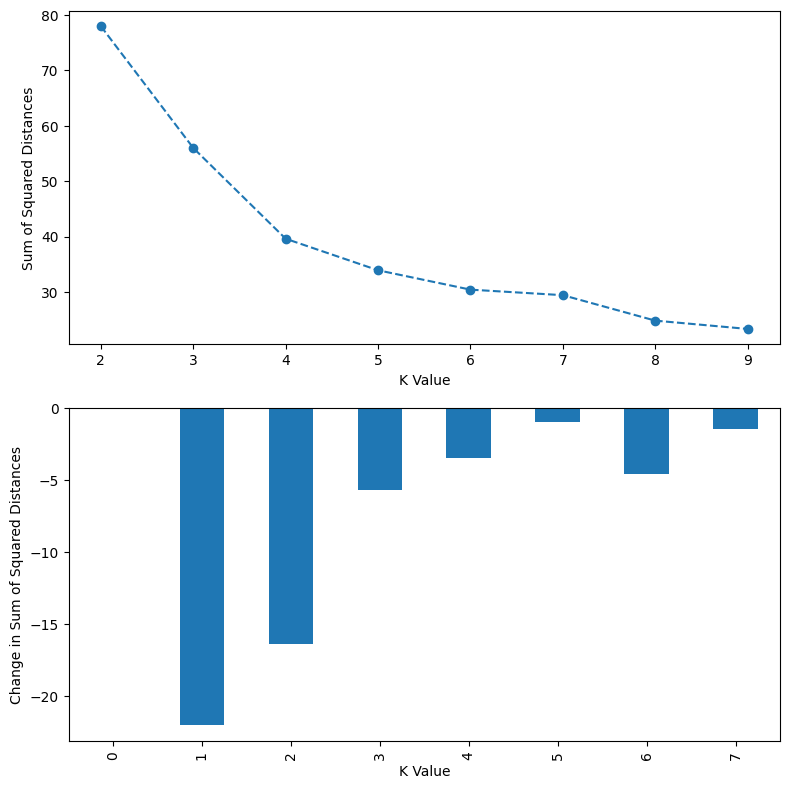

,0,1,2,3,4,5,6,7
n_clusters,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000
ssd,78.000,56.000,39.600,33.900,30.400,29.400,24.800,23.300
silhouette,0.467,0.378,0.403,0.379,0.342,0.318,0.303,0.297
diff,NaN,-22.000,-16.400,-5.700,-3.500,-1.000,-4.600,-1.500


In [13]:
db.kmean_mount(min_n=2, max_n=10)

## K-Means Knife Analysis

This cell performs a K-Means knife analysis using the `db.kmean_knife()` method. The method takes three parameters:

- `min_n`: The minimum number of clusters to analyze.
- `max_n`: The maximum number of clusters to analyze.
- `step`: The step size for incrementing the number of clusters.

The `db.kmean_knife()` method calculates the clustering results for different numbers of clusters within the specified range. It provides insights into the clustering behavior based on different cluster sizes.

By analyzing the results, you can determine the optimal number of clusters for your dataset based on various evaluation metrics such as silhouette score, within-cluster sum of squares, or other domain-specific criteria.

To perform the K-Means knife analysis, call the `db.kmean_knife()` method with the desired range of cluster numbers.

Build selected range of clusters and represent knife metric to ich of them 'Knifes' should be similar to ich other and have good shape without leakages


  0%|          | 0/4 [00:00<?, ?it/s]

n_clusters = 2 ssd = 78.6 average silhouette_score = 0.471


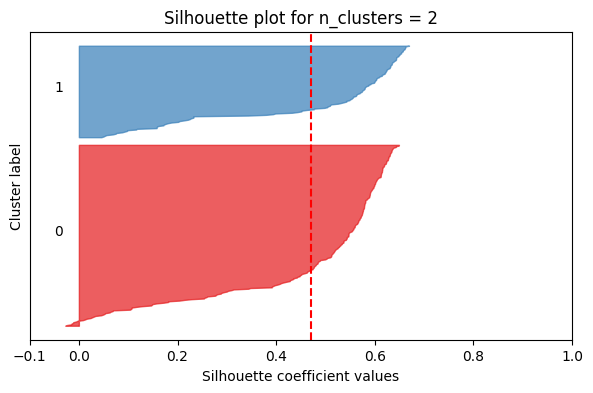

 25%|██▌       | 1/4 [00:00<00:00,  9.36it/s]

n_clusters = 3 ssd = 56.4 average silhouette_score = 0.389


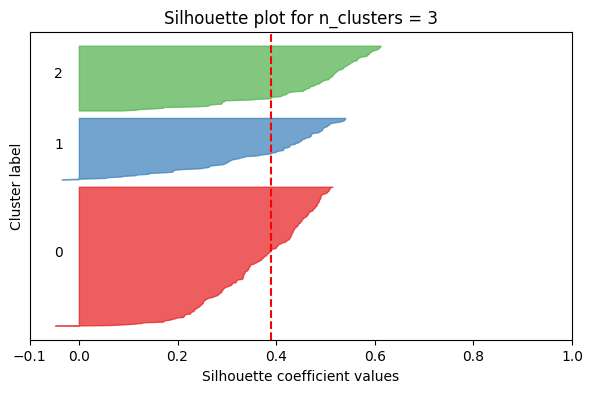

n_clusters = 4 ssd = 50.7 average silhouette_score = 0.351


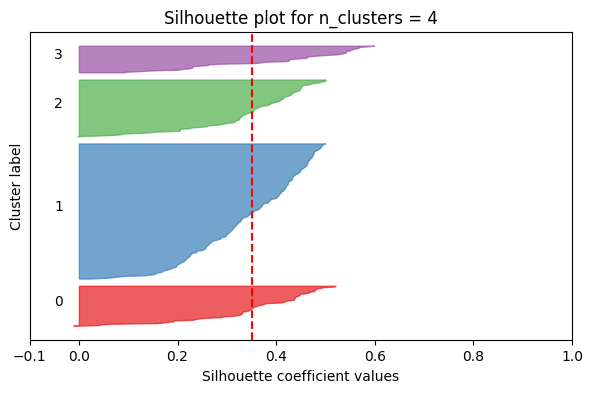

 75%|███████▌  | 3/4 [00:00<00:00,  9.16it/s]

n_clusters = 5 ssd = 33.9 average silhouette_score = 0.378


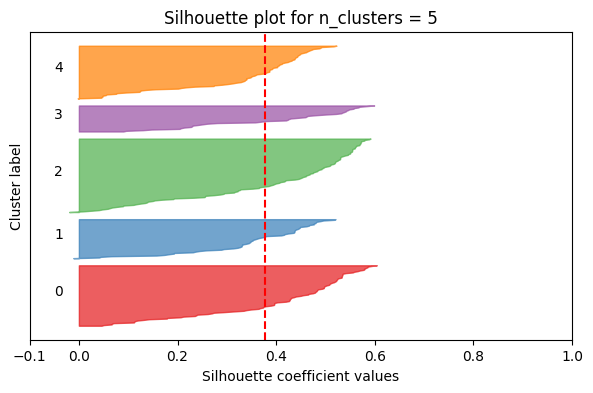

100%|██████████| 4/4 [00:00<00:00,  8.53it/s]


,2,3,4,5
ssd,78.600,56.400,50.700,33.900
silhouette,0.471,0.389,0.351,0.378
diff,-5.700,-16.800,NaN,NaN


In [14]:
db.kmean_knife(min_n=2, max_n=6, step=1)

In [15]:
db.kmean_knife(min_n=2, max_n=6, knife=False)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 19.28it/s]

n_clusters = 2 ssd = 78.6 average silhouette_score = 0.471
n_clusters = 3 ssd = 56.4 average silhouette_score = 0.387
n_clusters = 4 ssd = 39.6 average silhouette_score = 0.403
n_clusters = 5 ssd = 33.9 average silhouette_score = 0.379


,2,3,4,5
ssd,78.600,56.400,39.600,33.900
silhouette,0.471,0.387,0.403,0.379
diff,-16.800,-5.700,NaN,NaN


# DBSCAN

## DBSCAN Knife Analysis (eps)

This cell performs a DBSCAN knife analysis using the `db.dbscan_knife()` method. The method takes four parameters:

- `mod`: The mode of the analysis. In this case, it is set to "eps" to analyze the range of epsilon values.
- `min_eps`: The minimum epsilon value to analyze.
- `max_eps`: The maximum epsilon value to analyze.
- `range_eps`: The range of epsilon values to analyze.

The `db.dbscan_knife()` method calculates the clustering results for different epsilon values within the specified range. It provides insights into the clustering behavior based on different density thresholds.

By analyzing the results, you can determine the optimal epsilon value for your dataset based on various evaluation metrics such as silhouette score, within-cluster sum of squares, or other domain-specific criteria.

To perform the DBSCAN knife analysis, call the `db.dbscan_knife()` method with the desired range of epsilon values.

Build selected range of clusters and represent knife metric to ich of them 'Knifes' should be similar to ich other and have good shape without leakages

  0%|          | 0/5 [00:00<?, ?it/s]

check_n = 0.2 average silhouette_score = 0.324 outliers = 11.479591836734693


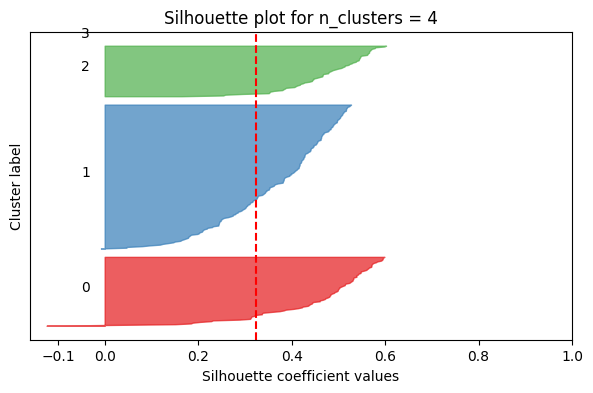

 20%|██        | 1/5 [00:00<00:00,  8.48it/s]

check_n = 0.25 average silhouette_score = 0.35 outliers = 5.1020408163265305


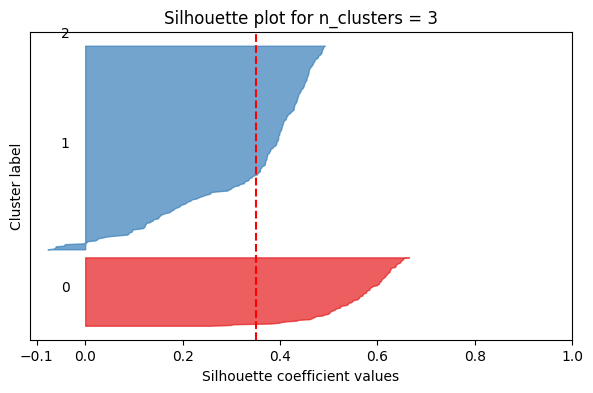

 40%|████      | 2/5 [00:00<00:00,  8.07it/s]

check_n = 0.30000000000000004 average silhouette_score = 0.385 outliers = 1.7857142857142858


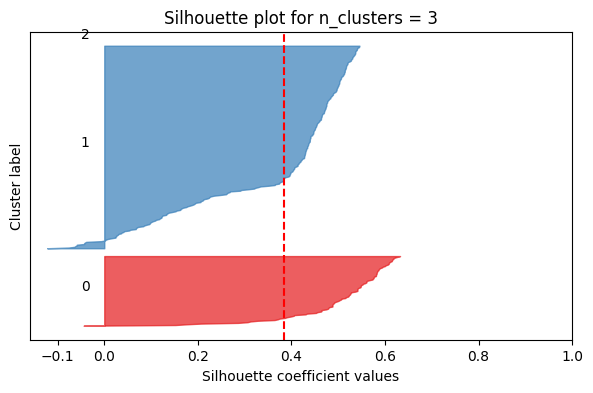

 60%|██████    | 3/5 [00:00<00:00,  7.98it/s]

check_n = 0.35000000000000003 average silhouette_score = 0.333 outliers = 0.5102040816326531


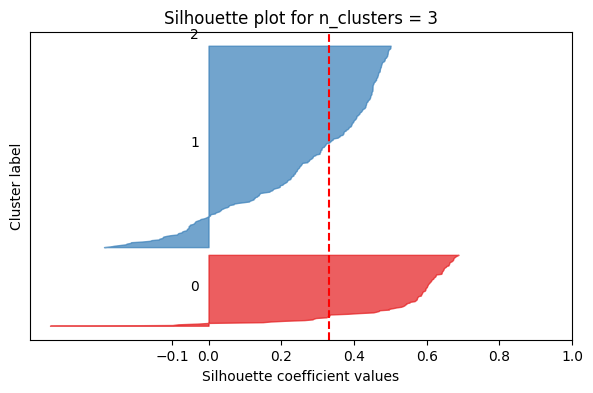

 80%|████████  | 4/5 [00:00<00:00,  7.19it/s]

check_n = 0.4 average silhouette_score = 0.284 outliers = 0.25510204081632654


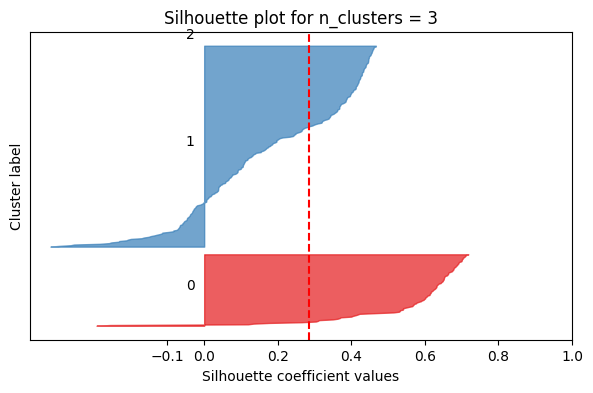

100%|██████████| 5/5 [00:00<00:00,  7.54it/s]


,0.20,0.25,0.30,0.35,0.40
n_clusters,4,3,3,3,3
silhouette,0.324,0.35,0.385,0.333,0.284
outliers,11.479592,5.102041,1.785714,0.510204,0.255102


In [16]:
db.dbscan_knife(mod="eps", min_eps=0.2, max_eps=0.4, range_eps=5)

## DBSCAN Knife Analysis (dot)

This cell performs a DBSCAN knife analysis using the `db.dbscan_knife()` method. The method takes five parameters:

- `mod`: The mode of the analysis. In this case, it is set to "dot" to analyze the range of sample sizes.
- `min_sample`: The minimum sample size to analyze.
- `max_sample`: The maximum sample size to analyze.
- `step_sample`: The step size for incrementing the sample size.
- `knife`: Optional parameter for drawing the knife diagram.

The `db.dbscan_knife()` method calculates the clustering results for different sample sizes within the specified range. It provides insights into the clustering behavior based on different density thresholds.

By analyzing the results, you can determine the optimal sample size for your dataset based on various evaluation metrics such as silhouette score, within-cluster sum of squares, or other domain-specific criteria.

To perform the DBSCAN knife analysis, call the `db.dbscan_knife()` method with the desired range of sample sizes.

Build selected range of clusters and represent the knife metric for each of them. The "knifes" should be similar to each other and have a good shape without leakages.


In [17]:
db.dbscan_knife(mod="dot",min_sample=70, max_sample=100, step_sample= 5, knife=False)

 71%|███████▏  | 5/7 [00:00<00:00, 49.69it/s]

check_n = 70 average silhouette_score = 0.119 outliers = 0.5102040816326531
check_n = 75 average silhouette_score = 0.34 outliers = 0.5102040816326531
check_n = 80 average silhouette_score = 0.36 outliers = 0.7653061224489796
check_n = 85 average silhouette_score = 0.494 outliers = 26.020408163265305
check_n = 90 average silhouette_score = 0.488 outliers = 27.551020408163264
check_n = 95 average silhouette_score = 0.468 outliers = 33.16326530612245


100%|██████████| 7/7 [00:00<00:00, 48.85it/s]

check_n = 100 average silhouette_score = 0.466 outliers = 33.92857142857143


,70,75,80,85,90,95,100
n_clusters,2,3,3,2,2,2,2
silhouette,0.119,0.34,0.36,0.494,0.488,0.468,0.466
outliers,0.510204,0.510204,0.765306,26.020408,27.55102,33.163265,33.928571


## DBSCAN Outliers Analysis

This cell performs a DBSCAN outliers analysis using the `db.dbscan_outliers()` method. The method takes one parameter:

- `percent`: The percentage of outliers to detect (for better visualisation only)

The `db.dbscan_outliers()` method calculates the outliers in the dataset using the DBSCAN algorithm from previously used method db.dbscan_knife(). It identifies data points that do not belong to any cluster based on their density.

By analyzing the results, you can identify and understand the outliers in your dataset. Outliers are data points that deviate significantly from the majority of the data and may require special attention or further investigation.

To perform the DBSCAN outliers analysis, call the `db.dbscan_outliers()` method with the desired percentage of outliers to detect.

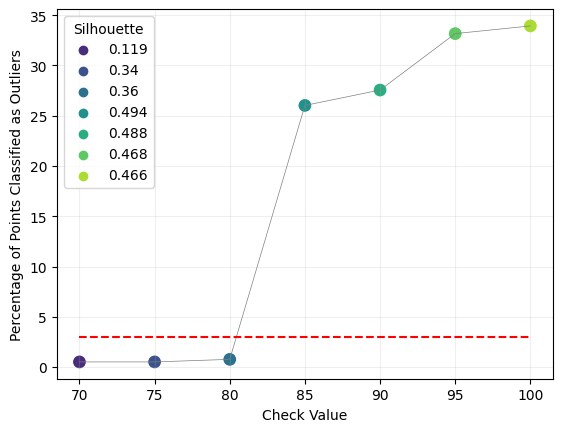

In [27]:
db.dbscan_outliers(percent=3)

## Method: db.build_cluster()

This method is used to build a clustering model using the specified clustering algorithm and parameters.

### Parameters:
- `cluster` (str): The clustering algorithm to use. Default is "kmean".
- `param` (str): The parameter to use for clustering. Default is "n_clusters".
- `value` (float): The value of the parameter to use for clustering.
- `value2` (float or None): An optional second value for the parameter. Default is None.


In [19]:
db.build_cluster(cluster="dbscan", param="eps", value=0.4, value2=None)

### output of method db.build_cluster()

In [20]:
db.result_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,cluster
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,1
388,44.0,4,97.0,52.0,2130,24.6,82,1
389,32.0,4,135.0,84.0,2295,11.6,82,1
390,28.0,4,120.0,79.0,2625,18.6,82,1


## Method: db.build_pipe()

This method is used to build a pipeline for data preprocessing and clustering using the previously built algorithm from method db.build_cluster and scaler from method db.preprocessing()


In [21]:
db.build_pipe()

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('dbscan', DBSCAN(eps=0.4))])

write documentation for db.simple_check(mode="outliers") db.simple_check(mode="origin", target="horsepower") db.simple_check(mode="built")

## Method: db.simple_check()

This method is used to perform a simple check on the dataset by using PCA

### Parameters:
- `mode` (str): The mode of the simple check. Default is "built" ("built, "outliers", "origin")

The `db.simple_check()` method help to visualise original df, reasult_df and outliers_df with PCA

To perform the simple check for outliers, call the `db.simple_check()` method with the desired mode parameter


pca.explained_variance_ratio_ = [0.71856712 0.11288046]
np.sum(pca.explained_variance_ratio_ = 0.8314475819394596


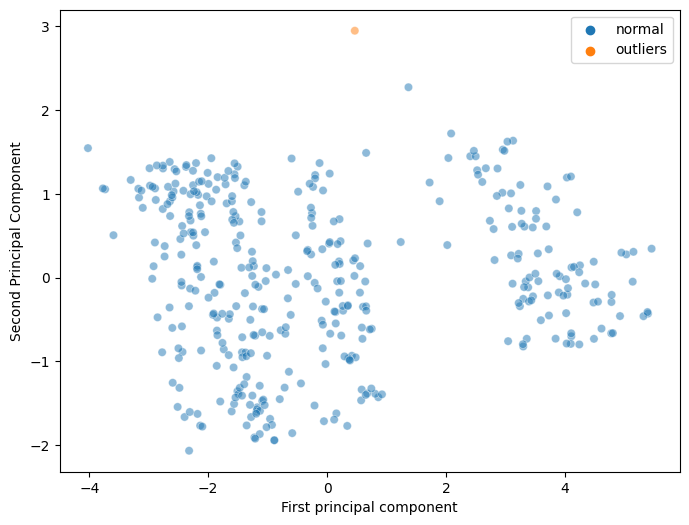

In [22]:
db.simple_check(mode="outliers")

pca.explained_variance_ratio_ = [0.71856712 0.11288046]
np.sum(pca.explained_variance_ratio_ = 0.8314475819394596


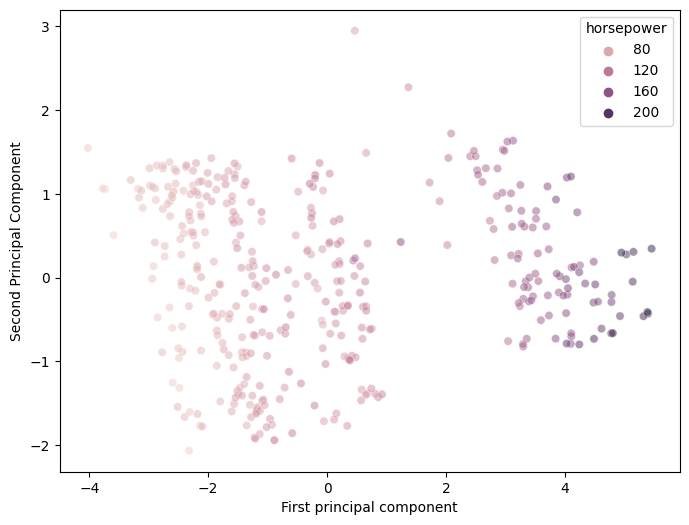

In [28]:
db.simple_check(mode="origin", target="horsepower")

pca.explained_variance_ratio_ = [0.71856712 0.11288046]
np.sum(pca.explained_variance_ratio_ = 0.8314475819394596


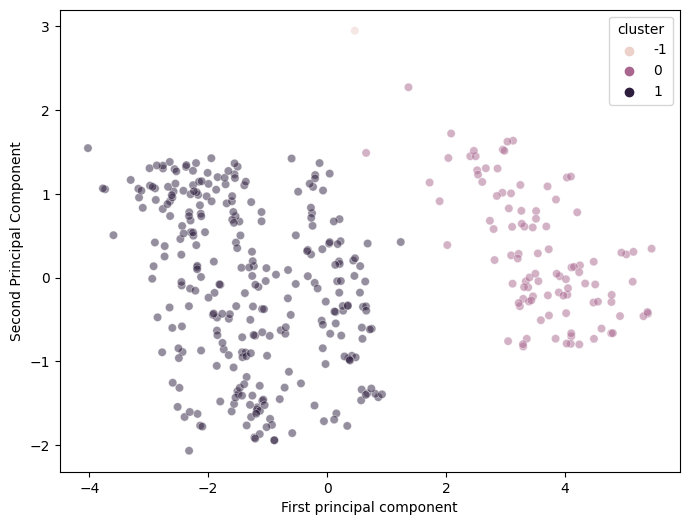

In [30]:
db.simple_check(mode="built")

## Simple diagram for better visualisation

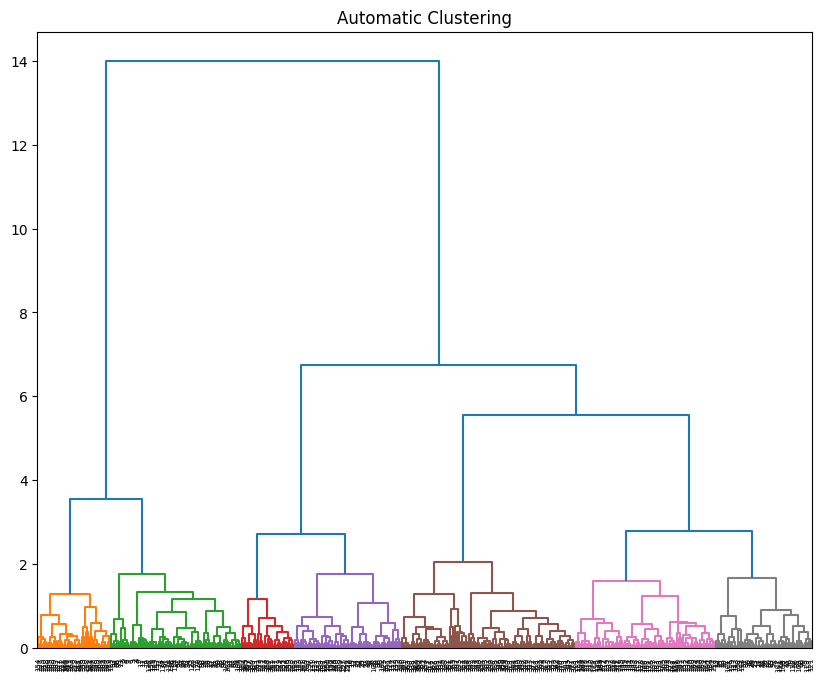

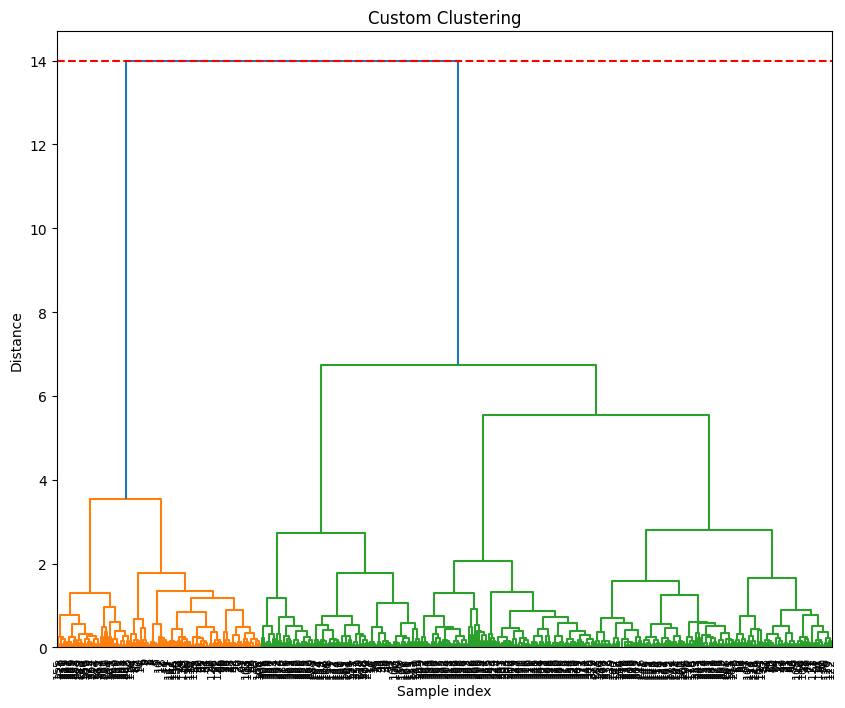

In [26]:
db.dendrogram(n_clusters=2)

<Axes: ylabel='cluster'>

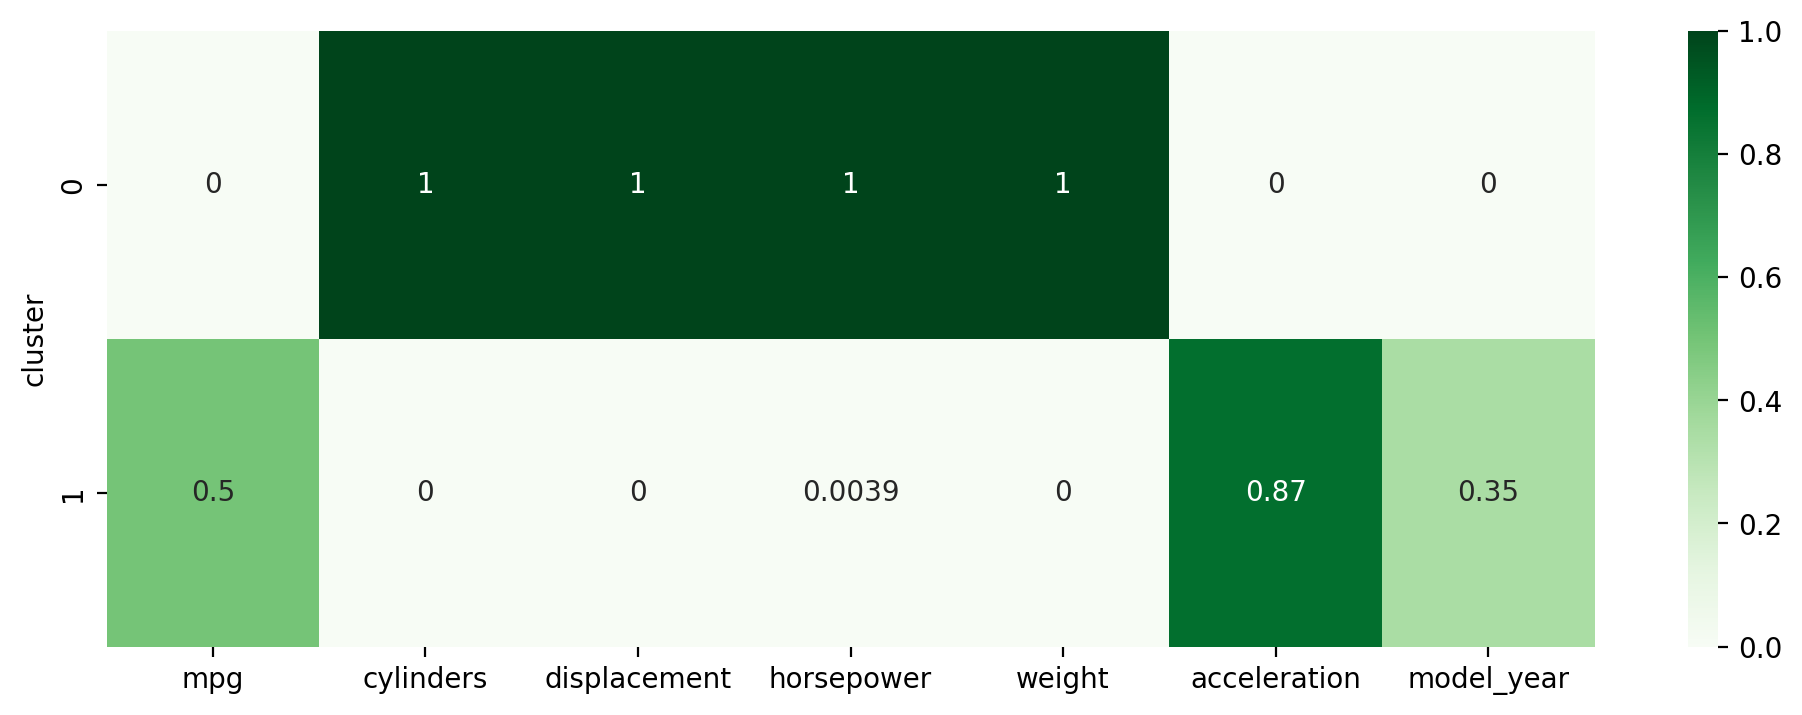

In [24]:
db.after_heat()

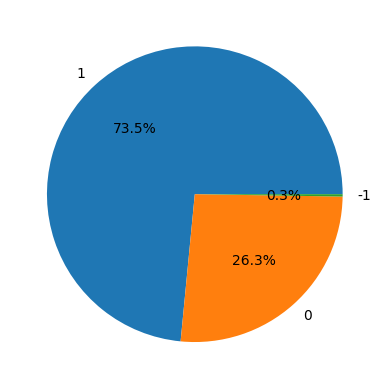

In [25]:
db.after_pie()